In [16]:
#loading required libraries.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
df = pd.read_csv("Employee.csv")

In [18]:
#checking rowsXcolumns.
df.shape

(14999, 10)

In [19]:
#checking first five records
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [21]:
#mean, median, mode, min, max, and quantiles
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [22]:
#Checking for catagorical and continous features/dtypes
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Departments               object
salary                    object
dtype: object

In [23]:
#descriptive stat for catagorical features
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [24]:
df['Departments '].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Departments , dtype: int64

In [25]:
df.shape[0]

14999

In [26]:
1237/14999

0.0824721648109874

[]

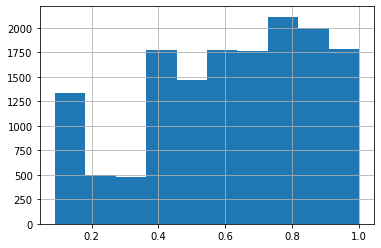

In [27]:
#histogram
df.satisfaction_level.hist()
plt.plot()

[]

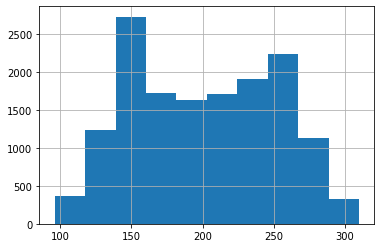

In [28]:
df.average_montly_hours.hist()
plt.plot()

[]

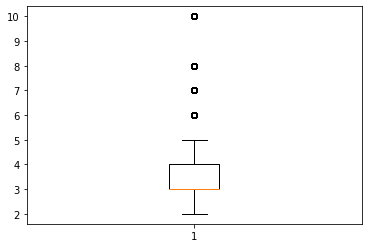

In [29]:
plt.boxplot(df.time_spend_company)
plt.plot()

In [30]:
def remove_outliers(df):
    outliers = {}
    for col in df.columns:
        if str(df[col].dtype) != 'object':
            df = df[np.abs(df[col]-df[col].mean()) < (3*df[col].std())]
            olrs = df[~(np.abs(df[col]-df[col].mean()) < (3*df[col].std()))]
            outliers = pd.DataFrame(olrs)
    return df

In [31]:
new_df = remove_outliers(df)

In [32]:
new_df.shape

(14330, 10)

[]

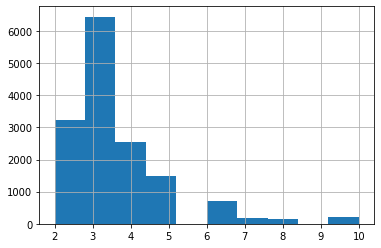

In [33]:
df.time_spend_company.hist()
plt.plot()

In [34]:
#calculating skewness score using pandas
df.time_spend_company.skew()

1.8533190474339154

In [35]:
#calculating skewness score using pandas
df.time_spend_company.kurtosis()

4.773210725010069

In [36]:
df.columns = ['satisfaction_level', 'last_evaluation', 'no_project',
       'avg_montly_hours', 'timespend_company', 'Work_accident', 'left',
       'promotion_last_5yrs', 'Departments', 'salary']

In [37]:
#correlation matrix
df.corr()

,satisfaction_level,last_evaluation,no_project,avg_montly_hours,timespend_company,Work_accident,left,promotion_last_5yrs
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
no_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
avg_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
timespend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5yrs,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


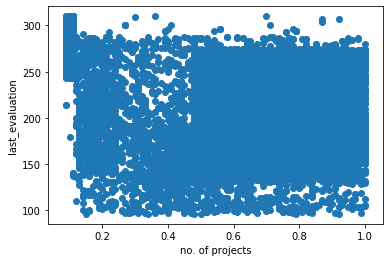

In [38]:
plt.scatter(df.satisfaction_level , df.avg_montly_hours)
plt.xlabel("no. of projects")
plt.ylabel("last_evaluation")
plt.show()

In [39]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'no_project',
       'avg_montly_hours', 'timespend_company', 'Work_accident', 'left',
       'promotion_last_5yrs', 'Departments', 'salary'],
      dtype='object')

In [40]:
pd.crosstab(df.salary , df.Departments)

Departments,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201
low,609,364,358,335,180,402,451,2099,1146,1372
medium,535,372,335,359,225,376,383,1772,942,1147


In [41]:
df.head()

,satisfaction_level,last_evaluation,no_project,avg_montly_hours,timespend_company,Work_accident,left,promotion_last_5yrs,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [42]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [43]:
#multi way frequency table
pd.crosstab([df.left , df.salary], df.no_project)

no_project     2     3     4    5    6    7
left salary                                
0    high     94   405   366  230   60    0
     low     378  1754  1838  946  228    0
     medium  349  1824  1752  973  231    0
1    high     46     3     2   15   13    3
     low     966    37   249  371  405  144
     medium  555    32   158  226  237  109

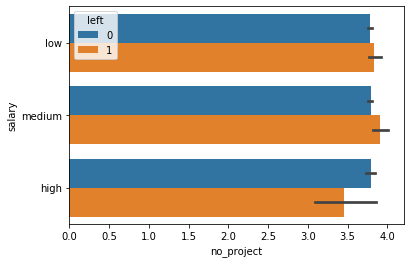

In [44]:
#bar plot
import seaborn as sns
sns.barplot(x="no_project",y="salary",data=df , hue='left')
plt.show()

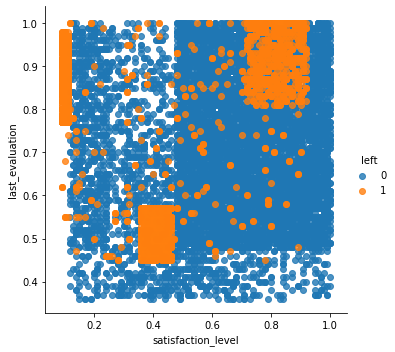

In [46]:
#scatter plot for multivariate analysis.
sns.lmplot(x='satisfaction_level',y="last_evaluation",data=df,hue='left',fit_reg=False)
plt.show()

In [47]:
#predicting attrition 
X = df.drop("left",axis=1)
y = df.left

In [49]:
df.dtypes

satisfaction_level     float64
last_evaluation        float64
no_project               int64
avg_montly_hours         int64
timespend_company        int64
Work_accident            int64
left                     int64
promotion_last_5yrs      int64
Departments             object
salary                  object
dtype: object

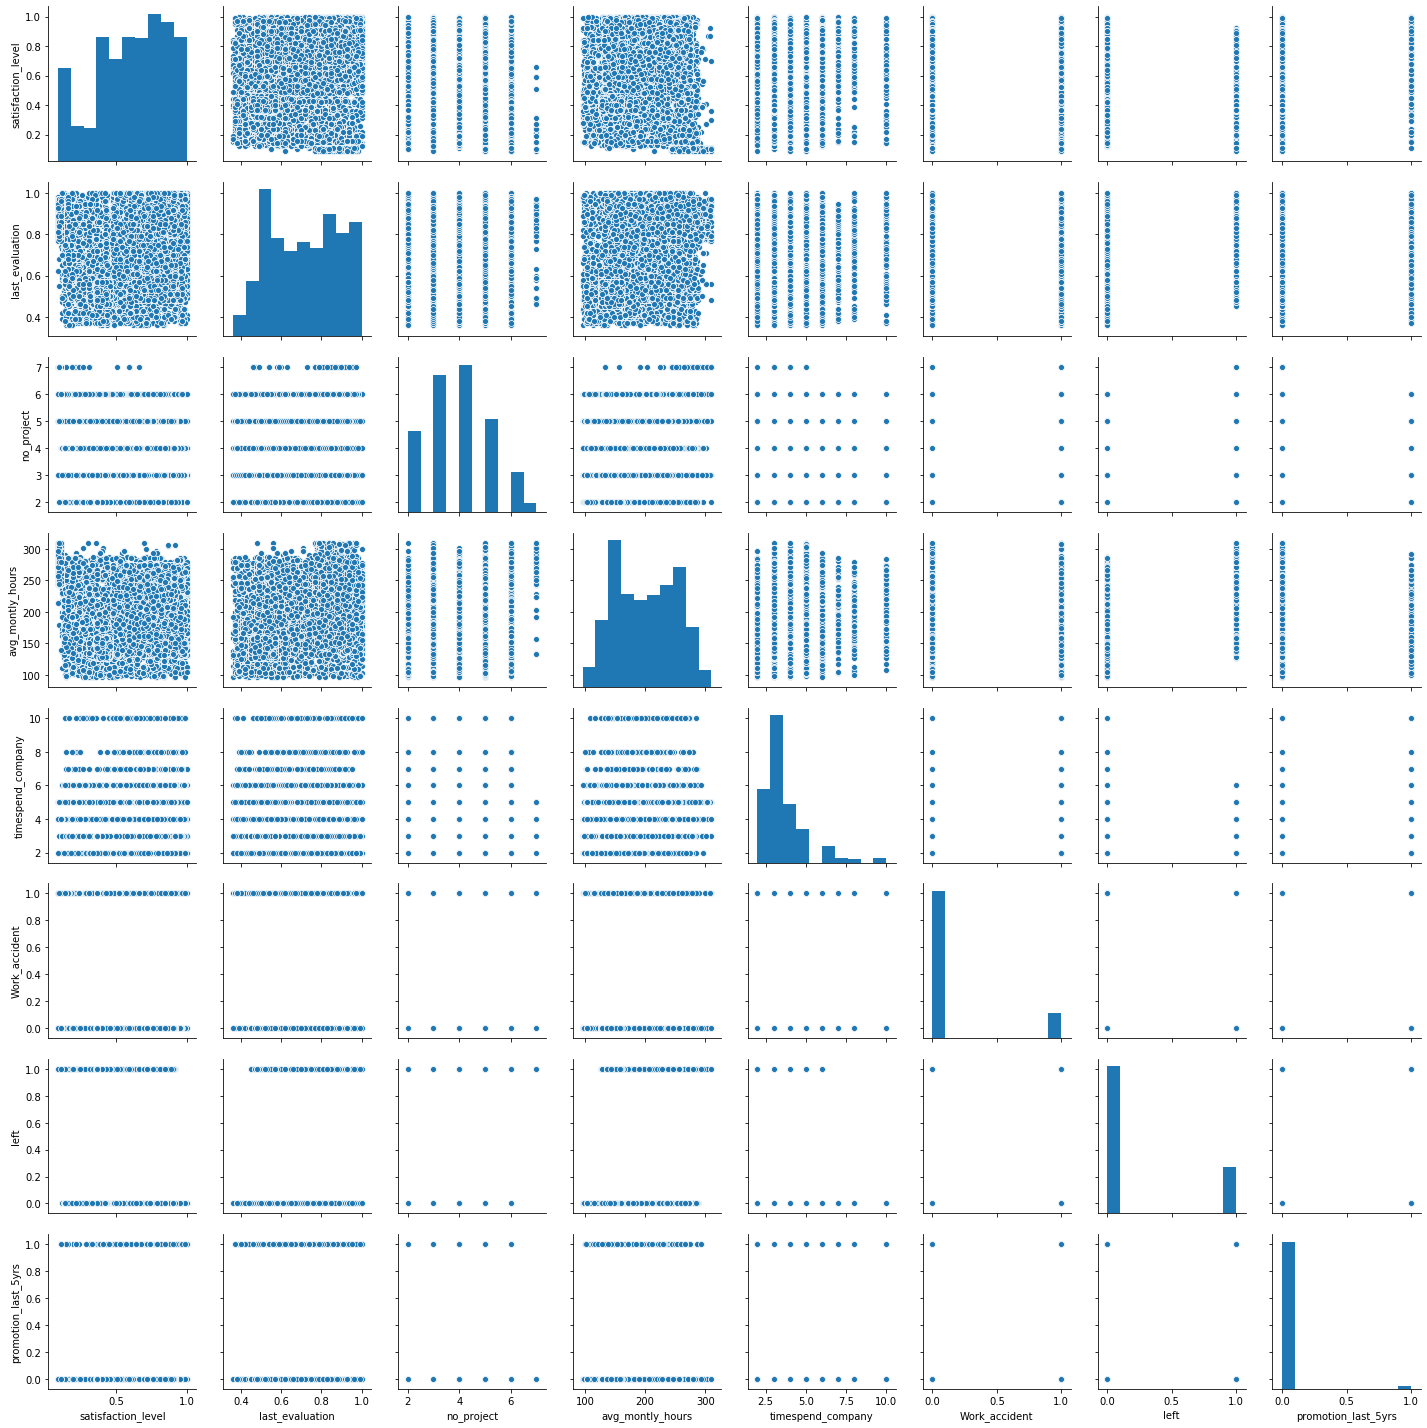

In [48]:
sns.pairplot(df)

In [164]:
#handeling catagorical variables
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
X.Departments = labelEncoder.fit_transform(X.Departments)
X.salary = labelEncoder.fit_transform(X.salary)

In [166]:
#splitting data train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [168]:
#random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=80)

In [169]:
# training the model
clf.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [170]:
#predicting y
y_pred = clf.predict(X_test)

In [172]:
#validating model using accuracy and confusion matrix
from sklearn.metrics import accuracy_score , confusion_matrix
print(accuracy_score(y_test , y_pred))
confusion_matrix(y_test ,y_pred)

0.9878787878787879


array([[3760,    9],
       [  51, 1130]])